In [1]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 10.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 MB 29.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 37.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 27.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 14.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 49.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 KB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 55.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 24.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 8.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 19.7 MB/s eta 0:00:0000:0100:01
     ━━━━

In [169]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

import numpy as np
%matplotlib widget

In [7]:
words = open('names.txt', 'r').read().splitlines()
len(words)

32033

In [9]:
chars = sorted(list(set(''.join(words))))
stoi = {c: i+1 for i, c in enumerate(chars)}
stoi['.'] = 0
itos = {i: c for c, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [105]:
BLOCK_SIZE = 3

X, Y = [], []
for w in words:
    # print(w)
    context = [0] * BLOCK_SIZE
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
        
X= torch.tensor(X)
Y = torch.tensor(Y)

In [106]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [12]:
C = torch.randn((27, 2))

In [16]:
X[1,0]

tensor(0)

In [21]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [20]:
C[torch.tensor([5,6,7])]

tensor([[ 0.3655, -1.3372],
        [-0.5498, -1.7882],
        [-0.0649,  0.4310]])

In [24]:
emb = C[X]  # this is the embedding vector for each of the character indexes
emb.shape

torch.Size([32, 3, 2])

### Hidden layer

In [25]:
h1_size = 100

W1 = torch.randn((6, h1_size))
b1 = torch.randn(h1_size)


In [41]:
# want emb @ W1 + b1 -- need to reshape emb because it's 32, 3, 2 want 32, 6

# there are different ways to do it
import functools
import operator

In [52]:
%%timeit

emb.reshape((32, 6) )

557 ns ± 5.75 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [47]:
%%timeit
torch.cat((emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]), dim=1)

8.47 µs ± 42.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [48]:
%%timeit
torch.cat(torch.unbind(emb, 1), dim=1)

3.58 µs ± 90.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [53]:
%%timeit
# storage offsets, strides, and shapes -- Eric pytorch internals
emb.view(32, 6)

544 ns ± 6.89 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [58]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)  # between -1 and 1 for tanh
h.shape, h.dtype

(torch.Size([32, 100]), torch.float32)

In [60]:
# + b1 broadcasting:
# 32, 100
#  1, 100
#   b1 gets copied 100x, added to each row


In [67]:
W2 = torch.randn((h1_size, 27))
b2 = torch.randn(27)
logits = h @ W2 + b2
logits.shape

counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)


In [70]:
prob[torch.arange(32), Y]  # probability the NN gives to the correct character in the sequence

loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(22.9184)

#### Rewrite the model

In [167]:
h_size = 100

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, h_size), generator=g)
b1 = torch.randn(h_size, generator=g)
W2 = torch.randn((h_size, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters), ' parameters in the model')
for p in parameters:
    p.requires_grad = True

3481  parameters in the model


In [173]:
%%time

batch_size = 32
learning_rate = 0.0001

losses = []


for _ in range(100):
    #minibatching
    #   intuition: better to have approximate gradient and take more steps than have exact gradient and take fewer steps
    ix = torch.randint(0, X.shape[0], (batch_size,), generator=g)
    
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)  # (32, 100)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(dim=1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y[ix])


    # why use F.cross_entropy? 1. Don't create intermediate tensors in memory; instead use fused kernels.
    #   2. backward pass can be more efficient (mathematically too since we can compute closed form of the derivative)
    #   3. numerical stability, e.g. when logits take on "extreme" values, we can't store e^100 as a float
    #        pytorch internally calculates the max of the logits and subtracts it from logits (cross_entropy(logits) == cross_entropy(logits+C))


    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update params
    for p in parameters:
        p.data += -learning_rate * p.grad
        
    losses.append(loss.item())


fit is  [3.32510648e-03 1.82901835e+01]
CPU times: user 118 ms, sys: 3.63 ms, total: 122 ms
Wall time: 22.5 ms


fit is  [3.32510648e-03 1.82901835e+01]


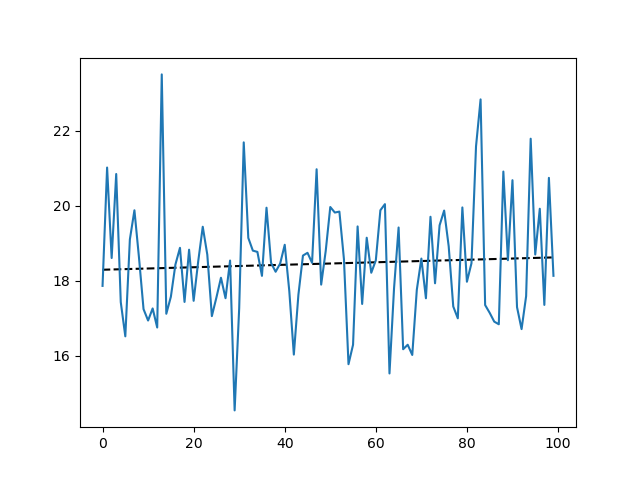

In [175]:
x = np.arange(len(losses))
fit = np.polyfit(x, losses, 1)
print('fit is ', fit)
fit_fn = np.poly1d(fit)
plt.figure()
plt.plot(x, fit_fn(x), '--k', label='Linear Fit')
plt.plot(losses)

In [161]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss.item()

2.479339361190796

In [110]:
logits.max(1)

torch.return_types.max(
values=tensor([11.1060, 12.2761, 21.2780,  ..., 12.7578, 13.8984, 12.7344],
       grad_fn=<MaxBackward0>),
indices=tensor([ 9,  8,  9,  ..., 10, 11, 17]))

There's a lower bound on the amount of error we can get because we have same inputs mapping to different outputs, e.g. ...-> e ...->o ...->m etc

In [114]:
# How do you determine the LR?

tensor([209557, 173779, 222565,  47771, 189787,  88685, 150806,  87246,  58992,
        165554, 225904, 102551,  56321,  49100,  88074,  50540, 124324, 198795,
         65611, 108688, 154332,  79452,  91231, 140574, 182432,  40672, 116387,
        161956,  52681, 191478,  71119,  68126])